<a href="https://colab.research.google.com/github/sayarghoshroy/PCA-Approaches/blob/master/PCA_approaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Demonstrating various approaches to Principal Component Analysis

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Add files 'mnist_train.csv' and 'mnist_test.csv' to your working directory
train_data = np.genfromtxt('mnist_train.csv', delimiter=',')
train_data = train_data[:, 1:]
train_data /= 255
mean = np.mean(train_data, axis = 0)
train_data = train_data - mean
# normalizing the data

In [0]:
print(train_data.shape)

(60000, 784)


In [0]:
cov_mat = np.cov(train_data.T)

In [0]:
print("Shape of Covariance Matrix :", cov_mat.shape)
# Shape of Covariance Matrix is (784, 784)

Shape of Covariance Matrix : (784, 784)


In [0]:
eigvals, eigvecs = np.linalg.eig(cov_mat)

In [0]:
idx = np.flip(eigvals.argsort())

In [0]:
x = np.matmul(train_data, eigvecs[:, 0]).real
y = np.matmul(train_data, eigvecs[:, 1]).real

In [0]:
print("Shape of x & y vectors :")
print(x.shape)
print(y.shape)
# Shape of x & y vectors: (60000, )

Shape of x & y vectors :
(60000,)
(60000,)


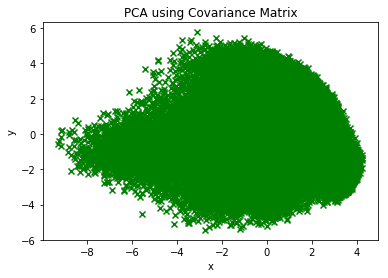

In [0]:
plt.figure()
plt.title("PCA using Covariance Matrix")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y, color = 'green', marker = 'x')
plt.show()

In [0]:
# Computing the reconstruction losses using closed form for PCA using covariance matrix
print("PCA using covariance matrix")

scores_covmat = np.zeros(shape = (60000, 2))
scores_covmat[:, 0] = x
scores_covmat[:, 1] = y

vecs_T_covmat = np.zeros(shape = (2, 784))
vecs_T_covmat[0, :] = eigvecs[:, 0]
vecs_T_covmat[1, :] = eigvecs[:, 1]

reconstructed_train_covmat = np.matmul(scores_covmat, vecs_T_covmat)

loss_covmat = 0
for iter in range(60000):
    temp_vec = reconstructed_train_covmat[iter, :] - train_data[iter, :]
    loss_covmat += np.dot(temp_vec, temp_vec)
loss_covmat /= 60000
    
print("Reconstruction Loss Using covariance matrix based PCA :", loss_covmat)
print("Loss based on Matrix Norms", np.linalg.norm(reconstructed_train_covmat - train_data))

PCA using covariance matrix
Reconstruction Loss Using covariance matrix based PCA : 43.8669192879197
Loss based on Matrix Norms 1622.348654659396


In [0]:
learn_rate = 0.1

def check_convergence(old_v, v):
    return False
    distance = np.linalg.norm(old_v - v)
    # we have reached convergence if the distance is close to 2
    # that signifies oscillation between values of v which are equal in magnitude
    # but exactly opposite in direction
    if np.abs(distance - 2.0) < 0.000001:
        return True
    return False

v_init = np.ones(784) / np.linalg.norm(np.ones(784))

In [0]:
# Computing PCA Component 1 using gradient descent
print("PCA using Gradient Descent")

iter_count = 0

v1_old = v_init
v1 = v1_old
multiplier = np.matmul(train_data.T, train_data)
while iter_count < 10001:
    iter_count += 1
    v1 = v1 - learn_rate * np.matmul(multiplier, v1_old)
    v1 = v1 / np.linalg.norm(v1)
    if(check_convergence(v1_old, v1)):
        print("Converged in", iter_count, "steps.")
        break
    v1_old = v1

PCA using Gradient Descent


In [0]:
# Checking if PCA components from Covariance Matrix method and Gradient Descent actually tally
print("Checking covariance matrix and gradient descent based updates for vector 1")
print("Distance metric:", np.linalg.norm(eigvecs[:, 0] -  v1))
c = np.dot(eigvecs[:, 0], v1) / (np.linalg.norm(eigvecs[:, 0]) * np.linalg.norm(v1))
angle = np.arccos(np.clip(c, -1, 1))
print("Angle metric:", angle)

Checking covariance matrix and gradient descent based updates for vector 1
Distance metric: 1.5818076976253452e-15
Angle metric: 0.0


In [0]:
# The 1st PCA components tally with each other. They represent the same line.

In [0]:
# Computing PCA component 2 using gradient descent

iter_count = 0

v2_old = np.asmatrix(v_init).T
v2 = v2_old
mult = train_data.T - np.matmul(np.matmul(np.asmatrix(v1).T, np.asmatrix(v1)), train_data.T)
multiplier = np.matmul(mult, mult.T)

In [0]:
while iter_count < 10001:
    iter_count += 1
    v2 = v2 - learn_rate * np.matmul(multiplier, v2_old)
    v2 = v2 / np.linalg.norm(v2)
    if(check_convergence(v2_old, v2)):
        print("Converged in", iter_count, "steps.")
        break
    v2_old = v2

v2 = (np.ndarray.flatten(np.array(v2)))

In [0]:
# Checking if PCA components from Covariance Matrix method and Gradient Descent actually tally
print("Checking covariance matrix and gradient descent based updates for vector 2")
print("Distance metric:", np.linalg.norm(eigvecs[:, 1] -  v2))
c = np.dot(eigvecs[:, 1], v2.T) / (np.linalg.norm(eigvecs[:, 1]) * np.linalg.norm(v2))
angle = np.arccos(np.clip(c, -1, 1))
print("Angle metric:", angle)

Checking covariance matrix and gradient descent based updates for vector 2
Distance metric: 1.1784038194011273e-15
Angle metric: 0.0


In [0]:
x_iter = np.matmul(train_data, v1.T).real
y_iter = np.matmul(train_data, v2.T).real

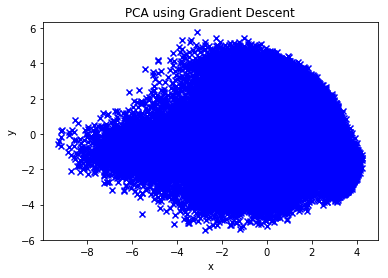

In [0]:
plt.figure()
plt.title("PCA using Gradient Descent")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_iter, y_iter, color = 'blue', marker = 'x')
plt.show()

In [0]:
# Computing the reconstruction losses for PCA with gradient descent 
scores = np.zeros(shape = (60000, 2))
scores[:, 0] = x
scores[:, 1] = y

vecs_T = np.zeros(shape = (2, 784))
vecs_T[0, :] = v1
vecs_T[1, :] = v2

reconstructed_train = np.matmul(scores, vecs_T)

loss = 0
for iter in range(60000):
    temp_vec = reconstructed_train[iter, :] - train_data[iter, :]
    loss += np.dot(temp_vec, temp_vec)
loss /= 60000
    
print("Reconstruction Loss Using Gradient Descent for PCA :", loss)
print("Loss based on Matrix Norms", np.linalg.norm(reconstructed_train - train_data))

Reconstruction Loss Using Gradient Descent for PCA : 43.8669192879197
Loss based on Matrix Norms 1622.348654659396


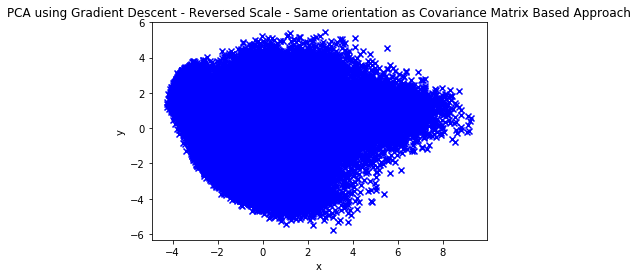

In [0]:
# Clearly the results using Covariance Matrix and Gradient Descent are identical
# NOTE: The flipped arrangement along the x, y is due to negative scaling
x_iter = x_iter * (-1)
y_iter = y_iter * (-1)

plt.figure()
plt.title("PCA using Gradient Descent - Reversed Scale - Same orientation as Covariance Matrix Based Approach")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_iter, y_iter, color = 'blue', marker = 'x')
plt.show()

PCA using L2 normalization


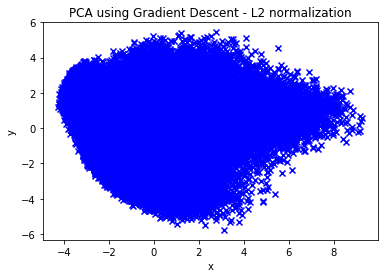

In [0]:
# PCA Top 2 components using L2 regularization
# lambda_val = 20000000
print("PCA using L2 normalization")

lambda_val = 1

# Computing PCA Component 1 using gradient descent
iter_count = 0
v1_old_L2 = v_init
v1_L2 = v1_old_L2
multiplier = np.matmul(train_data.T, train_data)
while iter_count < 10000:
    iter_count += 1
    v1_L2 = v1_L2 - learn_rate * (np.matmul(multiplier, v1_old_L2) + lambda_val * v1_old_L2)
    v1_L2 = v1_L2 / np.linalg.norm(v1_L2)
    if(check_convergence(v1_old_L2, v1_L2)):
        print("Converged in", iter_count, "steps.")
        break
    v1_old_L2 = v1_L2
    
# Computing PCA component 2 using gradient descent
iter_count = 0
v2_old_L2 = np.asmatrix(v_init).T
v2_L2 = v2_old_L2
mult = train_data.T - np.matmul(np.matmul(np.asmatrix(v1_L2).T, np.asmatrix(v1_L2)), train_data.T)
multiplier = np.matmul(mult, mult.T)

while iter_count < 10000:
    iter_count += 1
    v2_L2 = v2_L2 - learn_rate * (np.matmul(multiplier, v2_old_L2) + lambda_val * v2_old_L2)
    v2_L2 = v2_L2 / np.linalg.norm(v2_L2)
    if(check_convergence(v2_old_L2, v2_L2)):
        print("Converged in", iter_count, "steps.")
        break
    v2_old_L2 = v2_L2

v2_L2 = (np.ndarray.flatten(np.array(v2_L2)))

# Computing the x, y coordinates
x_L2 = np.matmul(train_data, v1_L2.T).real
y_L2 = np.matmul(train_data, v2_L2.T).real

# Plotting the values
plt.figure()
plt.title("PCA using Gradient Descent - L2 normalization")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_L2, y_L2, color = 'blue', marker = 'x')
plt.show()

In [0]:
# Computing the reconstruction losses for L2 regularization
scores_L2 = np.zeros(shape = (60000, 2))
scores_L2[:, 0] = x_L2
scores_L2[:, 1] = y_L2

vecs_T_L2 = np.zeros(shape = (2, 784))
vecs_T_L2[0, :] = v1_L2
vecs_T_L2[1, :] = v2_L2

reconstructed_train_L2 = np.matmul(scores_L2, vecs_T_L2)

loss_L2 = 0
for iter in range(60000):
    temp_vec = reconstructed_train_L2[iter, :] - train_data[iter, :]
    loss_L2 += np.dot(temp_vec, temp_vec)
loss_L2 /= 60000
    
print("Loss Using L2 regularization :", loss_L2)
print("Loss based on Matrix Norms", np.linalg.norm(reconstructed_train_L2 - train_data))

Loss Using L2 regularization : 43.866919287919714
Loss based on Matrix Norms 1622.348654659396


In [0]:
def calc_pseudo_gradient(v):
    v = np.ndarray.flatten(np.array(v))
    gradient = np.zeros(784)
    for iter in range(784):
        if(v[iter] > 0):
            gradient[iter] = 1
        elif(v[iter] < 0):
            gradient[iter] = -1
            
    return gradient

PCA using L1 regularization


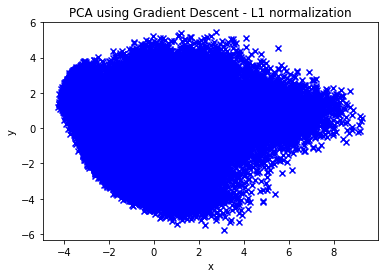

In [0]:
# PCA Top 2 components using L1 regularization
# lambda_val = 5000
print("PCA using L1 regularization")

lambda_val = 1

# Computing PCA Component 1 using gradient descent
iter_count = 0
v1_old_L1 = v_init
v1_L1 = v1_old_L1
multiplier = np.matmul(train_data.T, train_data)
while iter_count < 10000:
    iter_count += 1
    v1_L1 = v1_L1 - learn_rate * (np.matmul(multiplier, v1_old_L1) 
                                  + lambda_val * calc_pseudo_gradient(v1_old_L1))
    v1_L1 = v1_L1 / np.linalg.norm(v1_L1)
    if(check_convergence(v1_old_L1, v1_L1)):
        print("Converged in", iter_count, "steps.")
        break
    v1_old_L1 = v1_L1
    
# Computing PCA component 2 using gradient descent
iter_count = 0
v2_old_L1 = np.asmatrix(v_init).T
v2_L1 = v2_old_L1
mult = train_data.T - np.matmul(np.matmul(np.asmatrix(v1_L1).T, np.asmatrix(v1_L1)), train_data.T)
multiplier = np.matmul(mult, mult.T)

while iter_count < 10000:
    iter_count += 1
    v2_L1 = v2_L1 - learn_rate * (np.matmul(multiplier, v2_old_L1) 
                                  + lambda_val * calc_pseudo_gradient(v2_old_L1).reshape(784, 1))
    v2_L1 = v2_L1 / np.linalg.norm(v2_L1)
    if(check_convergence(v2_old_L1, v2_L1)):
        print("Converged in", iter_count, "steps.")
        break
    v2_old_L1 = v2_L1

v2_L1 = (np.ndarray.flatten(np.array(v2_L1)))

# Computing the x, y coordinates
x_L1 = np.matmul(train_data, v1_L1.T).real
y_L1 = np.matmul(train_data, v2_L1.T).real

# Plotting the values
plt.figure()
plt.title("PCA using Gradient Descent - L1 normalization")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_L1, y_L1, color = 'blue', marker = 'x')
plt.show()

In [0]:
# Computing the reconstruction losses for L1 regularization
scores_L1 = np.zeros(shape = (60000, 2))
scores_L1[:, 0] = x_L1
scores_L1[:, 1] = y_L1

vecs_T_L1 = np.zeros(shape = (2, 784))
vecs_T_L1[0, :] = v1_L1
vecs_T_L1[1, :] = v2_L1

reconstructed_train_L1 = np.matmul(scores_L1, vecs_T_L1)

loss_L1 = 0
for iter in range(60000):
    temp_vec = reconstructed_train_L1[iter, :] - train_data[iter, :]
    loss_L1 += np.dot(temp_vec, temp_vec)
loss_L1 /= 60000
    
print("Loss Using L1 regularization :", loss_L1)
print("Loss based on Matrix Norms", np.linalg.norm(reconstructed_train_L1 - train_data))

Loss Using L1 regularization : 43.866919357283834
Loss based on Matrix Norms 1622.3486559420471


In [0]:
# ^_^